In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os

fn = []

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        fn.append(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/easiest-diabetes-classification-dataset/Diabetes Classification.csv


In [2]:
df = pd.read_csv(fn[0])
df

,Age,Gender,BMI,Blood Pressure,FBS,HbA1c,Family History of Diabetes,Smoking,Diet,Exercise,Diagnosis
0,45,Male,25,Normal,100,5.7,No,No,Healthy,Regular,No
1,55,Female,30,High,120,6.4,Yes,Yes,Poor,No,Yes
2,65,Male,35,High,140,7.1,Yes,Yes,Poor,No,Yes
3,75,Female,40,High,160,7.8,Yes,Yes,Poor,No,Yes
4,40,Male,20,Normal,80,5.0,No,No,Healthy,Regular,No
...,...,...,...,...,...,...,...,...,...,...,...
123,17,Female,15,Normal,100,5.7,No,Yes,Poor,No,Yes
124,22,Male,19,Normal,120,6.4,No,Yes,Poor,No,Yes
125,27,Female,24,High,140,7.1,No,Yes,Poor,No,Yes
126,32,Male,29,High,160,7.8,No,Yes,Poor,No,Yes


In [3]:
df.isnull().values.any()

False

In [4]:
df.isnull().sum().sum()

0

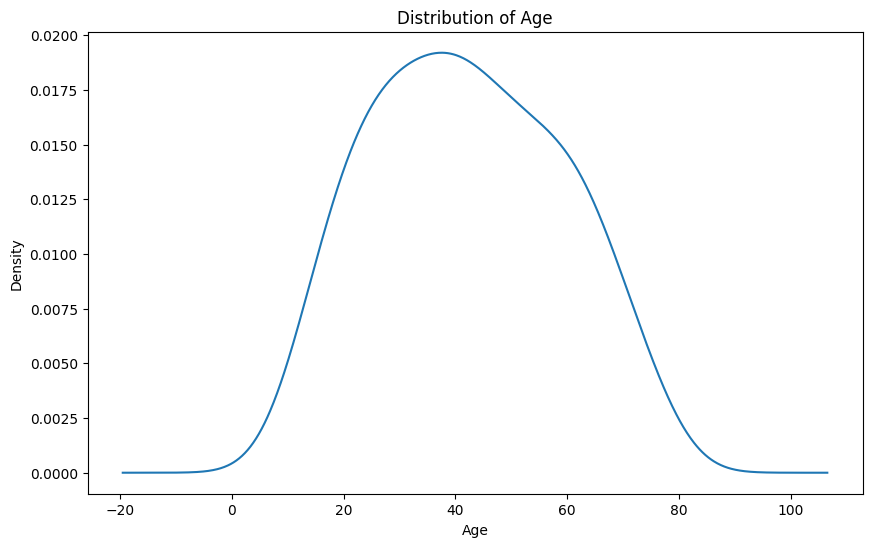

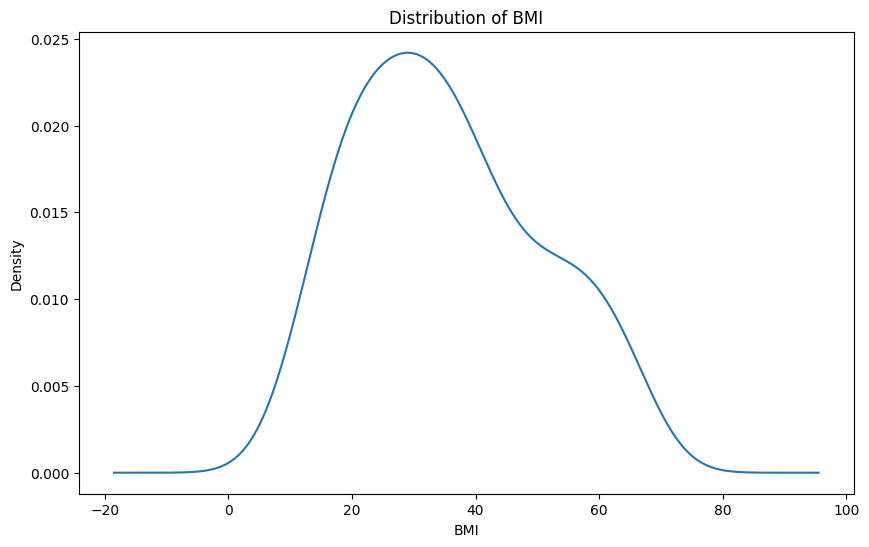

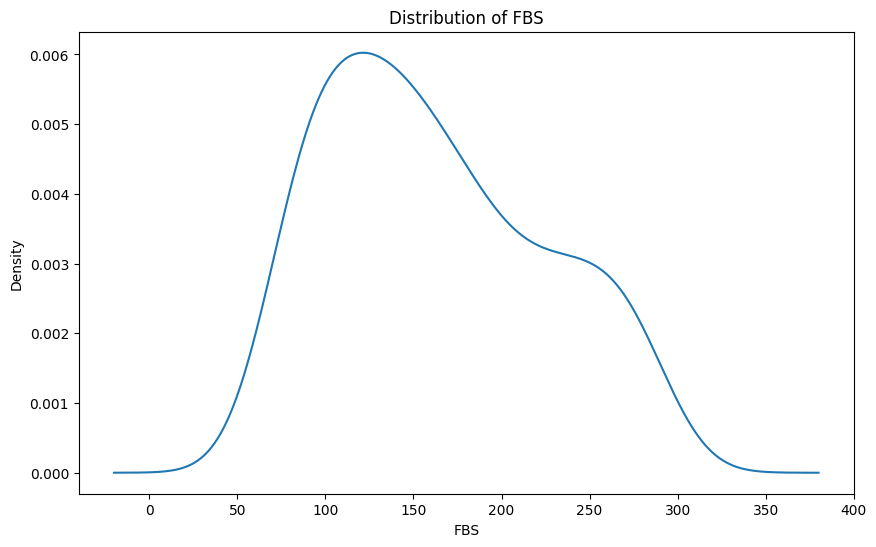

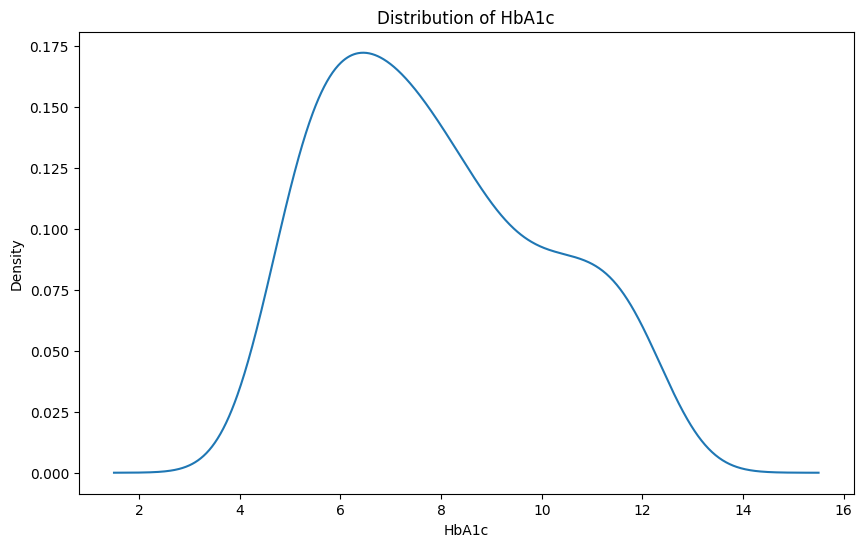

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Plot the distribution for each numeric column
for column in df.select_dtypes(include=['number']).columns:
    plt.figure(figsize=(10, 6))
    df[column].plot(kind='kde')  # Kernel Density Estimation plot
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Density')
    plt.show()

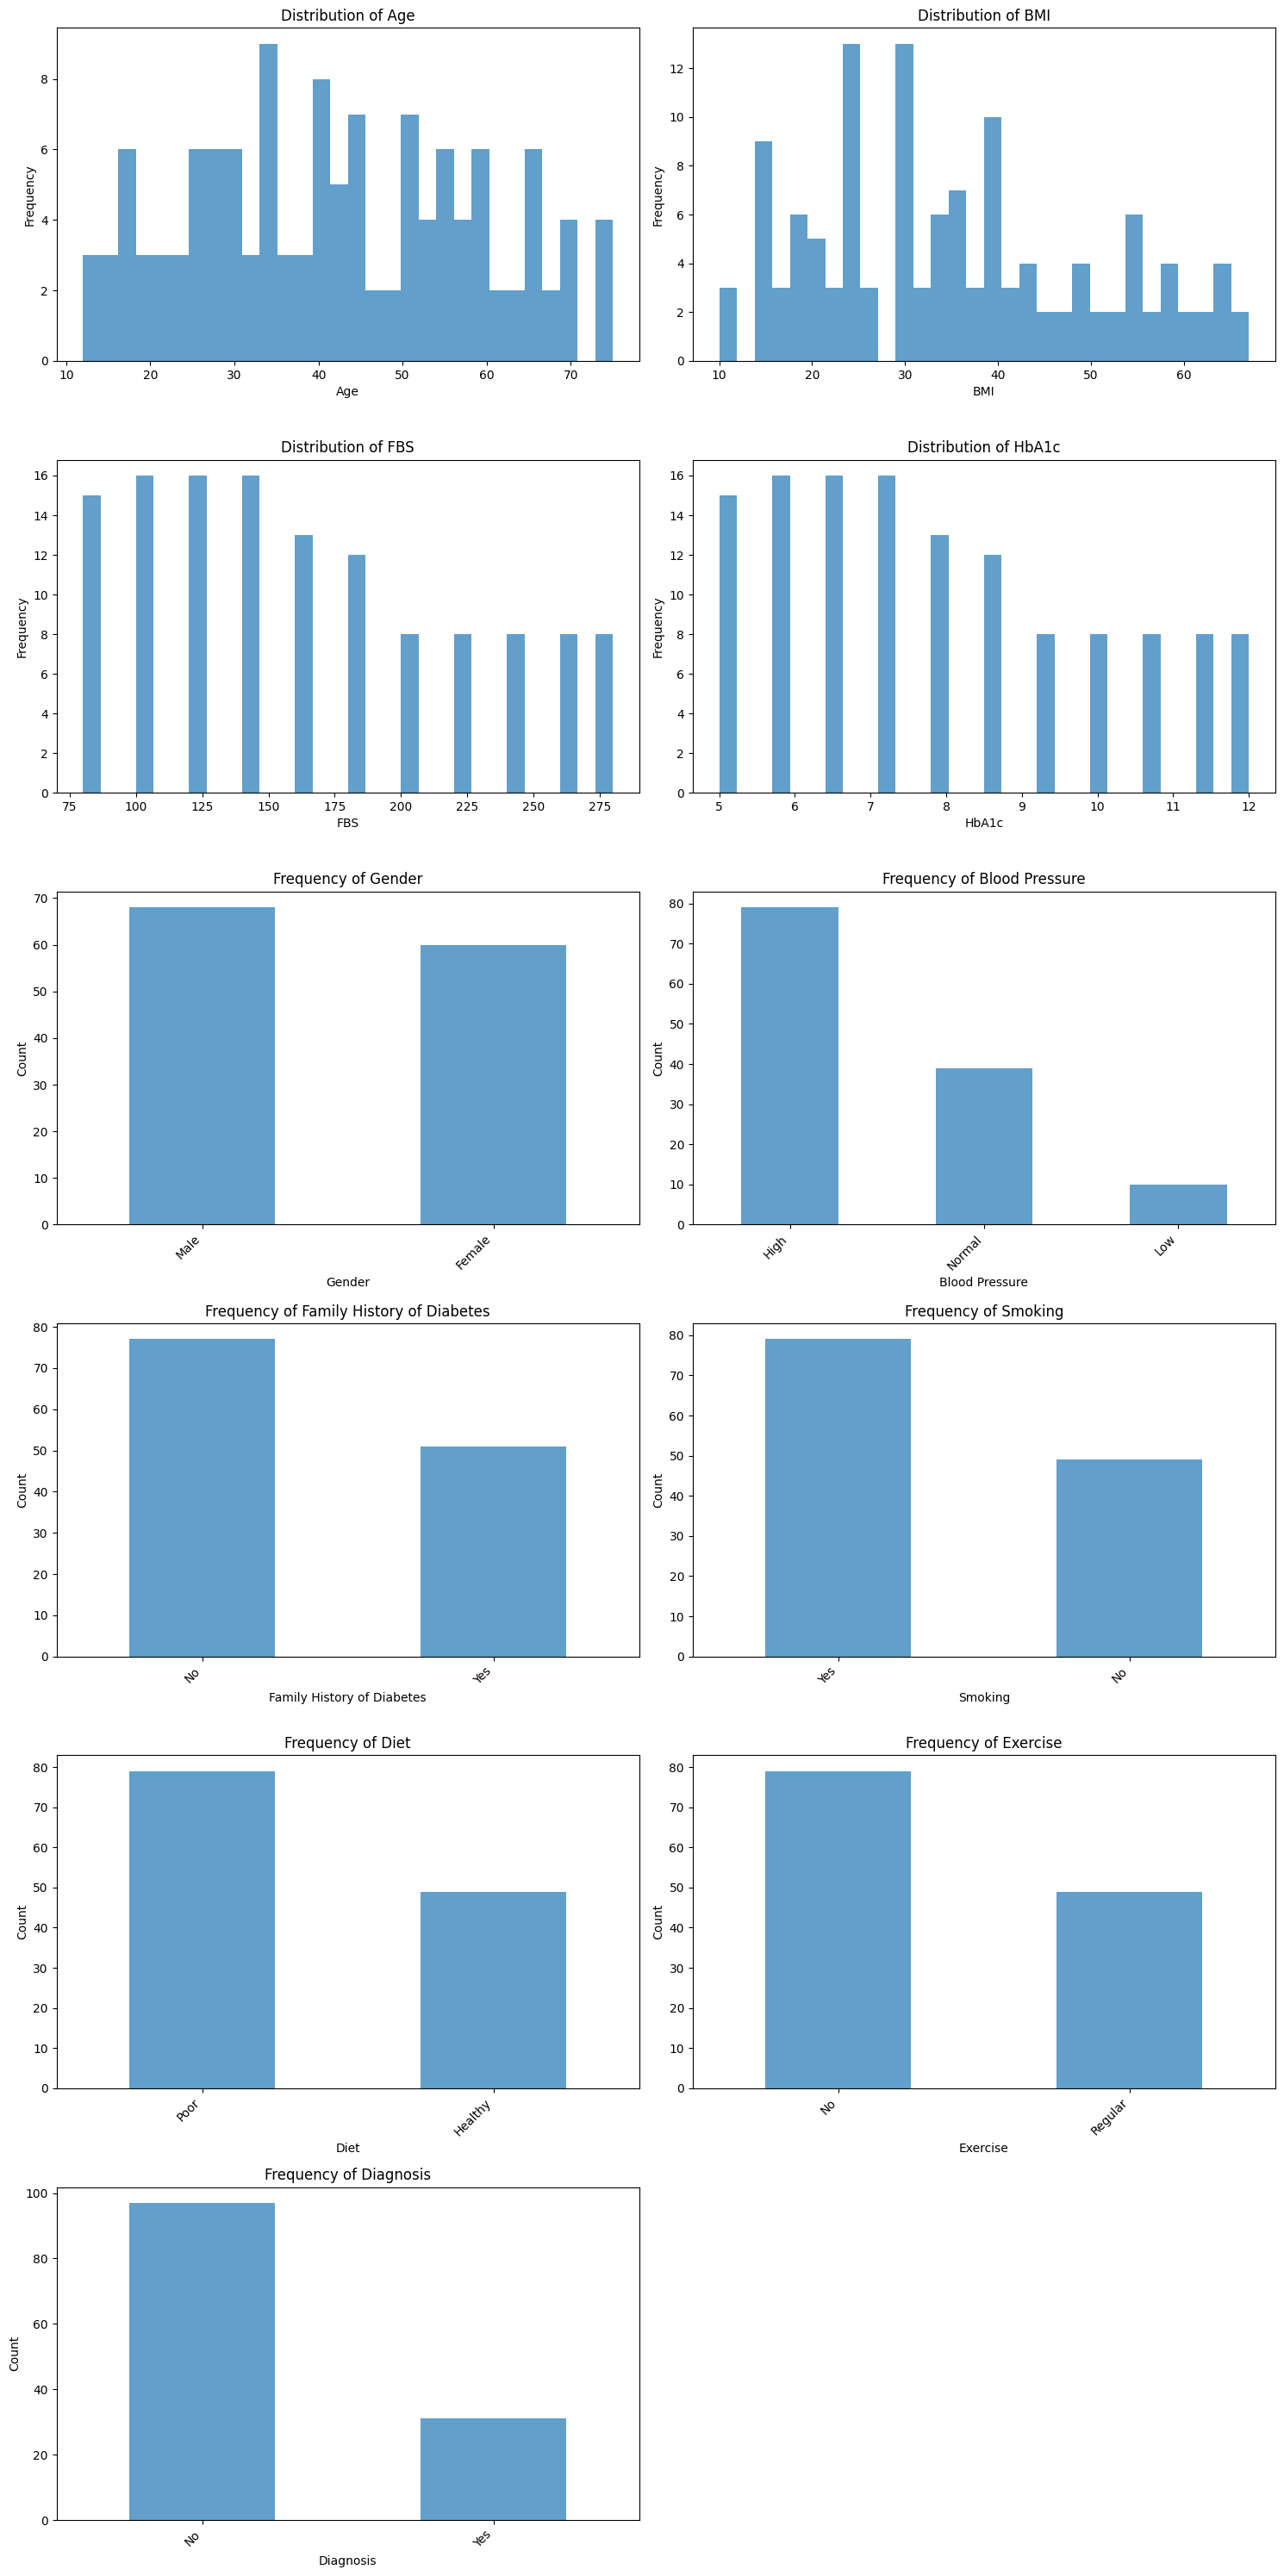

In [6]:
# Select numeric and categorical columns
numeric_columns = df.select_dtypes(include=['number']).columns
categorical_columns = df.select_dtypes(include=['object', 'category']).columns

# Determine the number of rows needed
n_cols = 2
n_rows = (len(numeric_columns) + len(categorical_columns) + n_cols - 1) // n_cols

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 5))

# Flatten axes array for easy iteration
axes = axes.flatten()

# Plot the distribution for each numeric column
for i, column in enumerate(numeric_columns):
    df[column].plot(kind='hist', ax=axes[i], bins=30, alpha=0.7)  # Histogram plot
    axes[i].set_title(f'Distribution of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')

# Plot the distribution for each categorical column
for j, column in enumerate(categorical_columns, start=i + 1):
    df[column].value_counts().plot(kind='bar', ax=axes[j], alpha=0.7)  # Bar plot
    axes[j].set_title(f'Frequency of {column}')
    axes[j].set_xlabel(column)
    axes[j].set_ylabel('Count')
    axes[j].set_xticklabels(axes[j].get_xticklabels(), rotation=45, ha='right')

# Remove any empty subplots
for k in range(j + 1, len(axes)):
    fig.delaxes(axes[k])

plt.tight_layout()
plt.show()

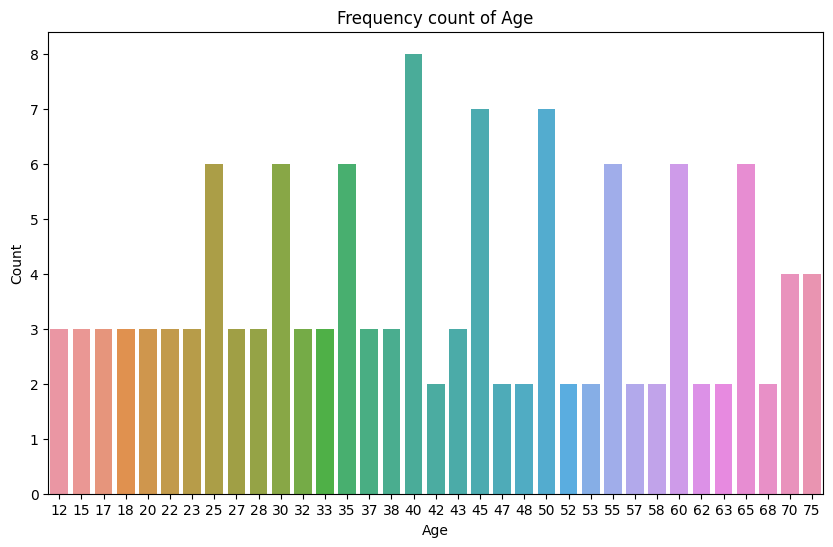

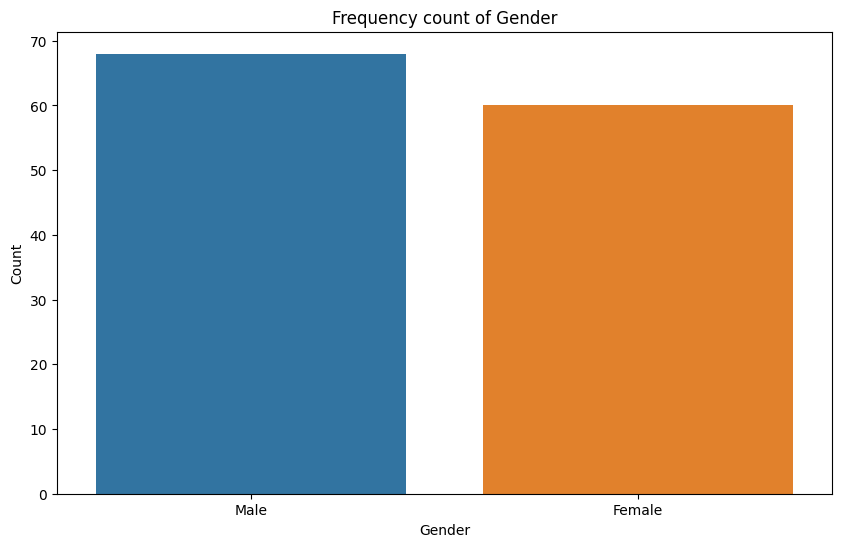

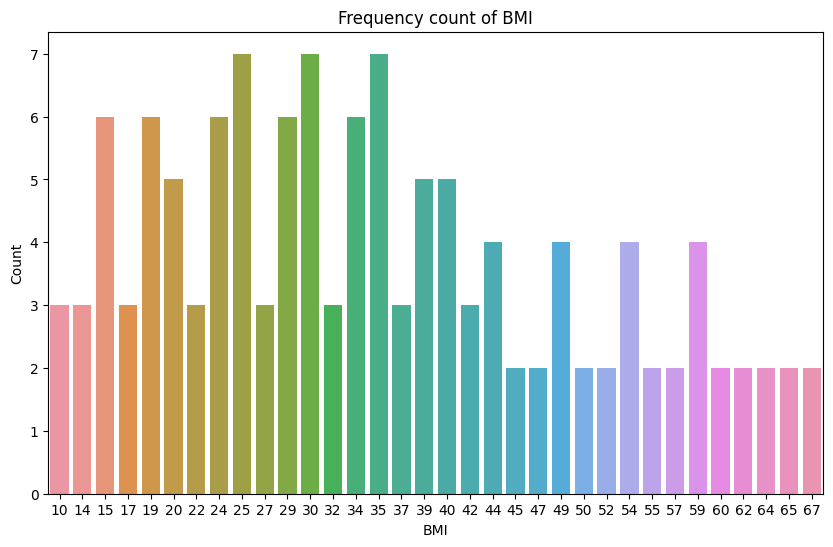

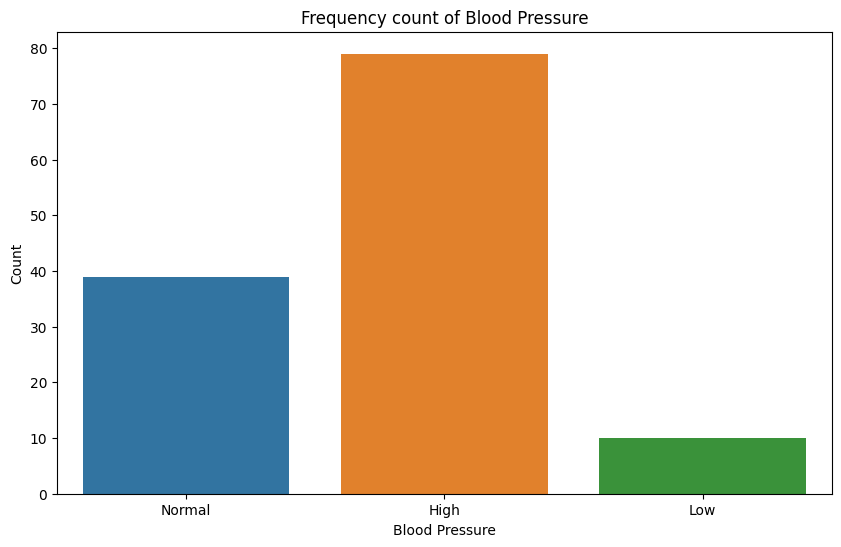

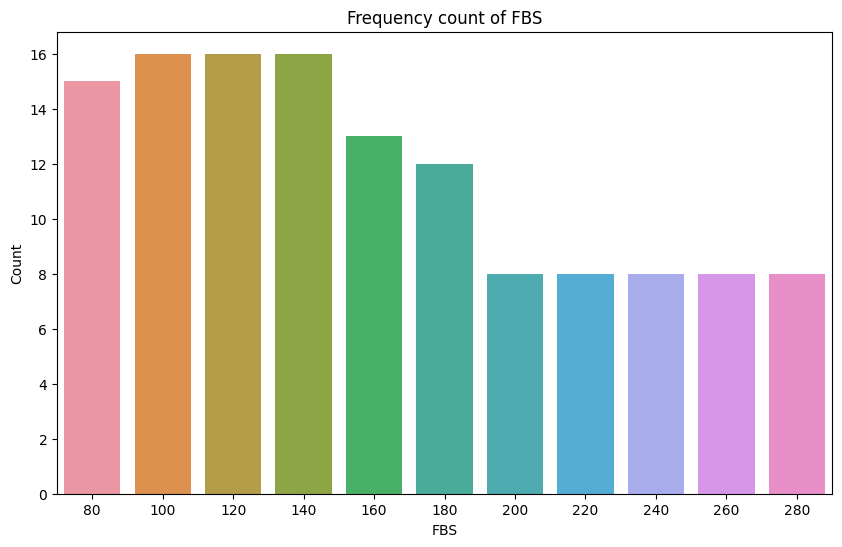

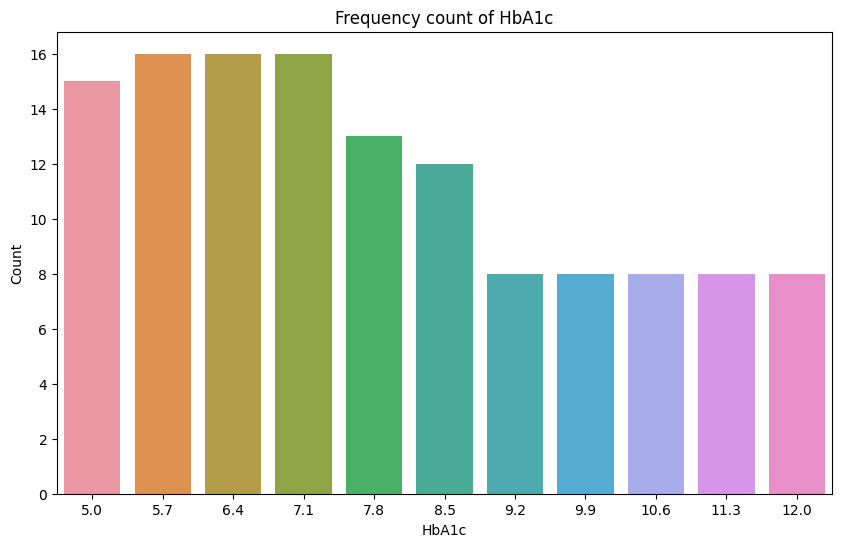

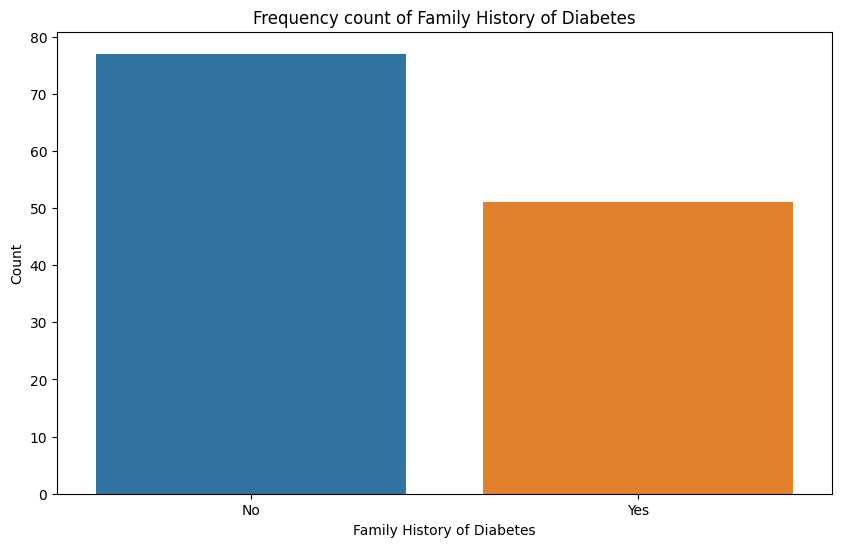

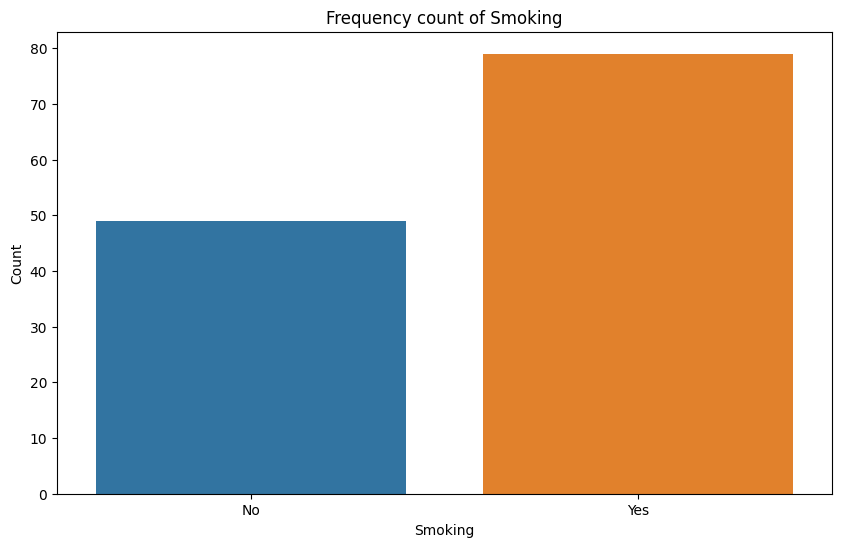

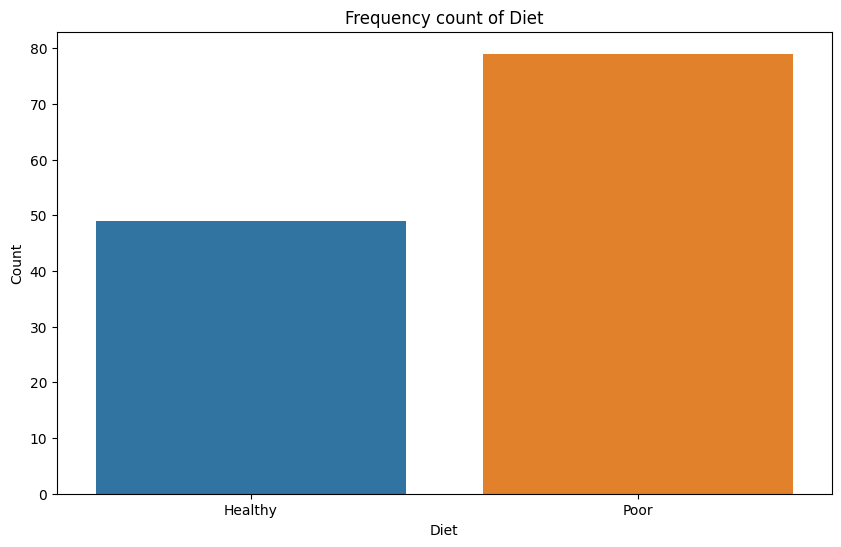

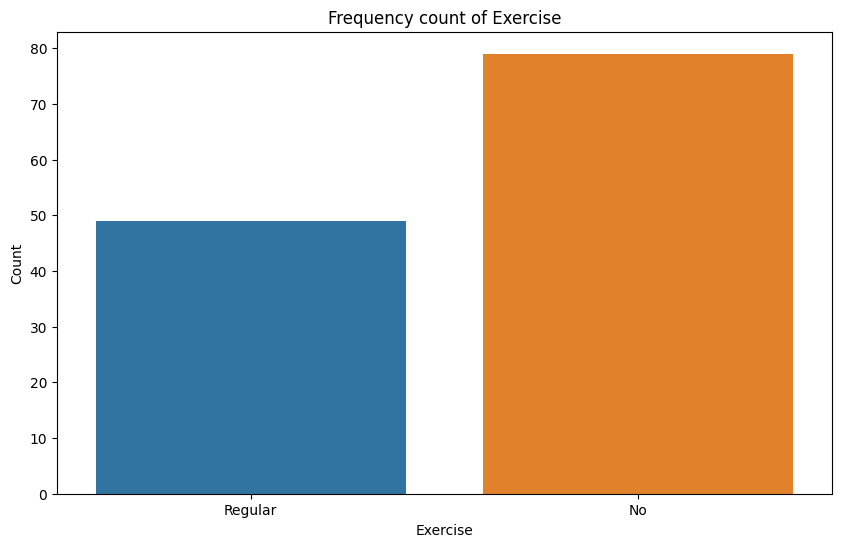

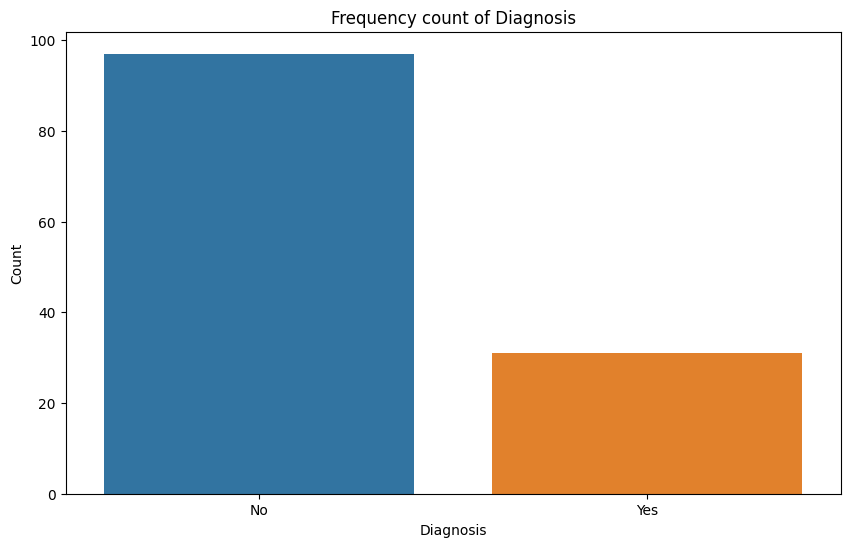

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

for column in df.columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x=column)
    plt.title(f'Frequency count of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.show()


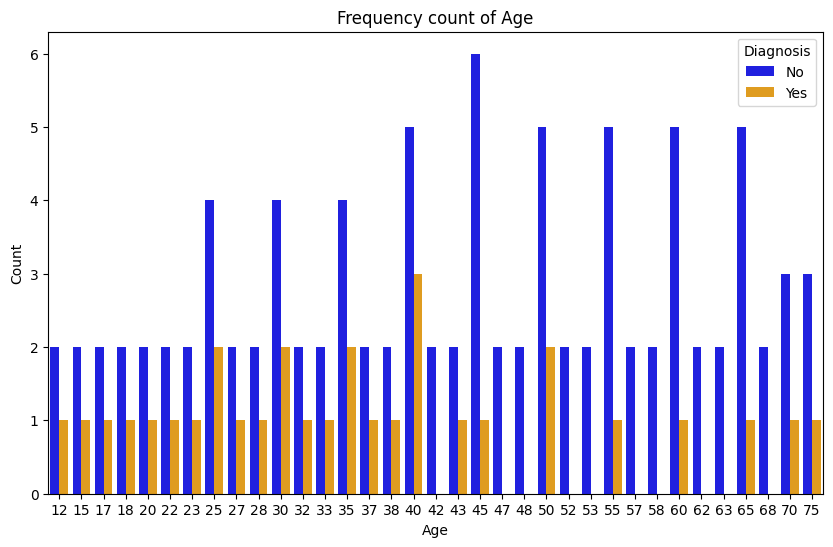

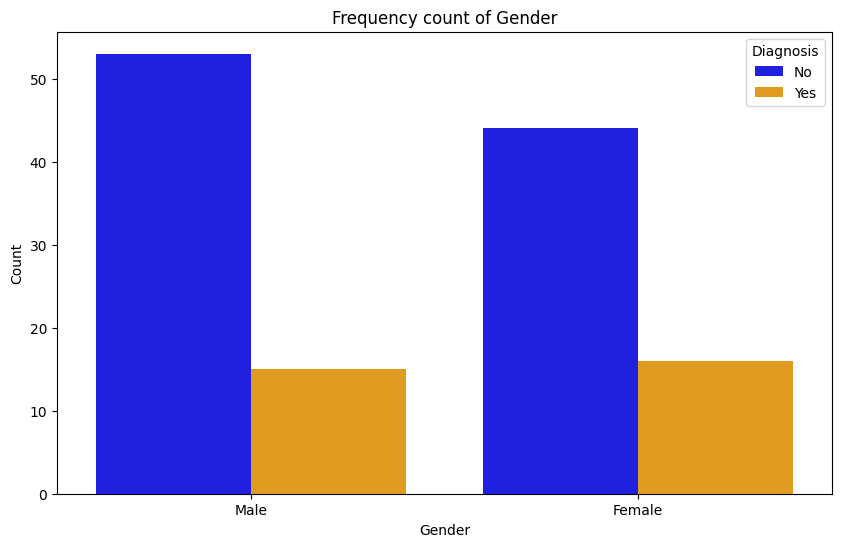

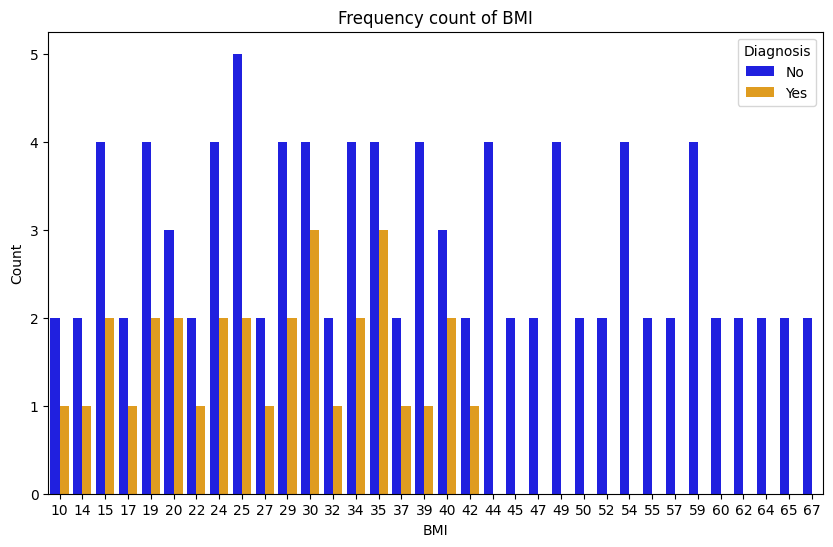

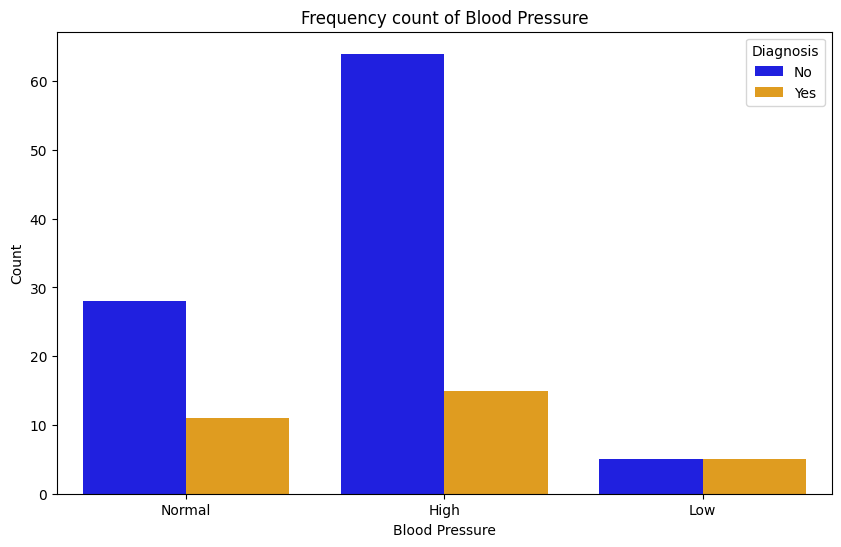

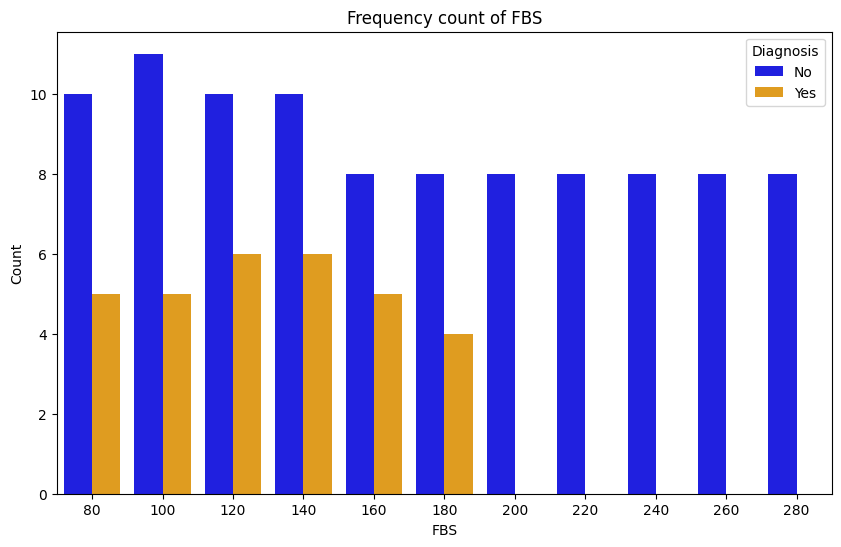

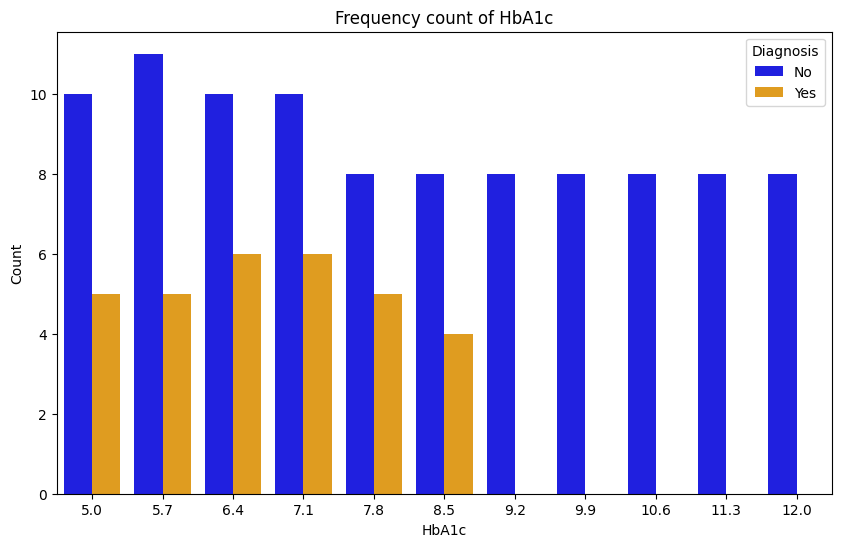

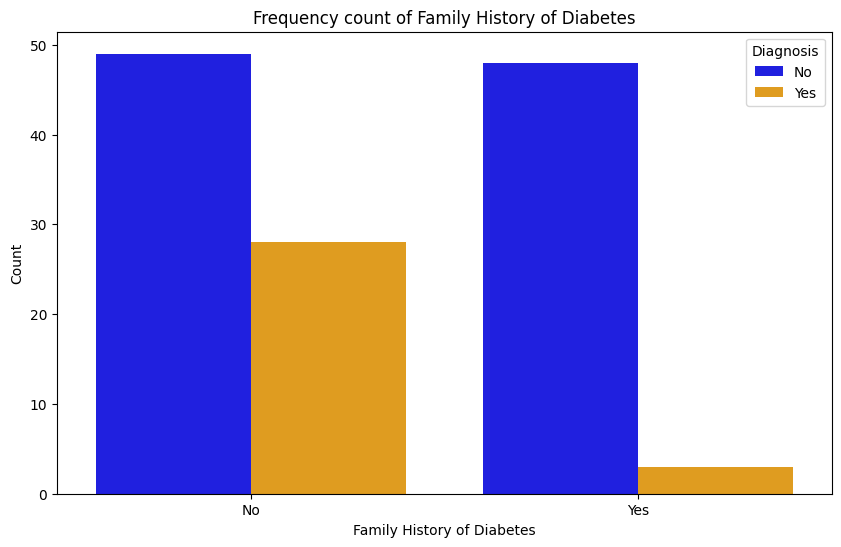

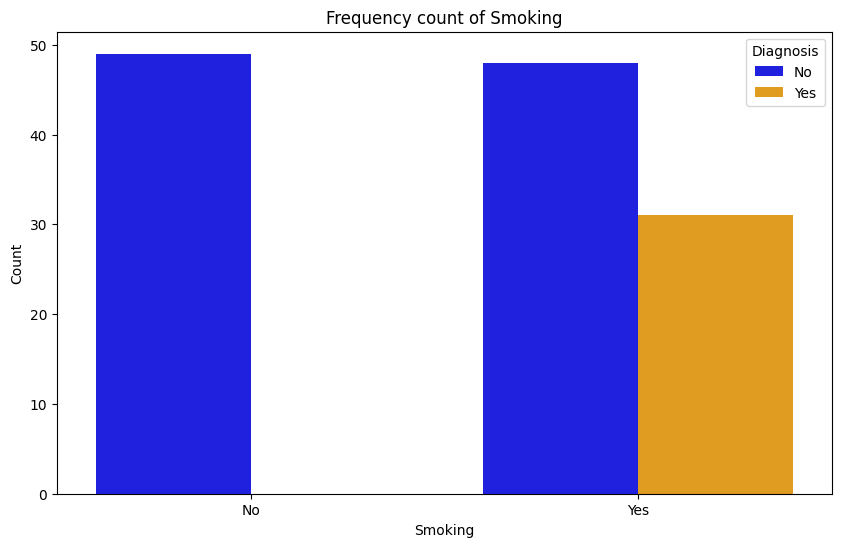

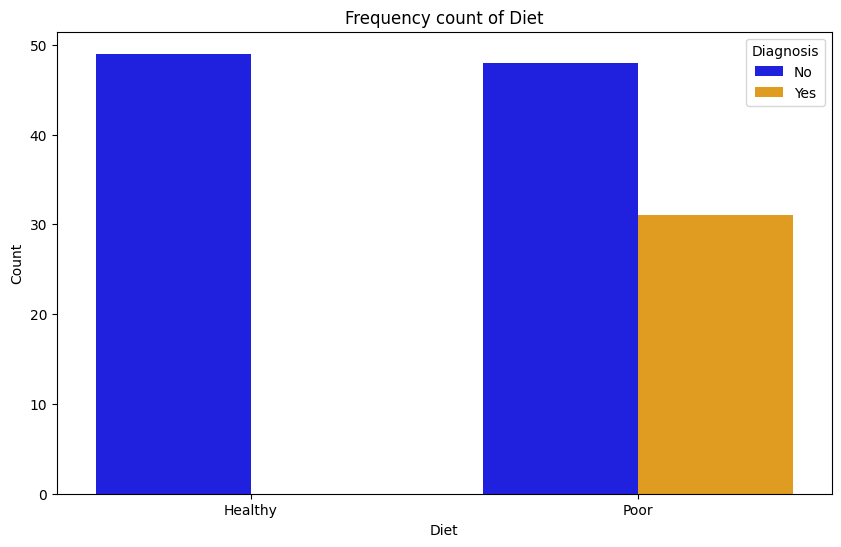

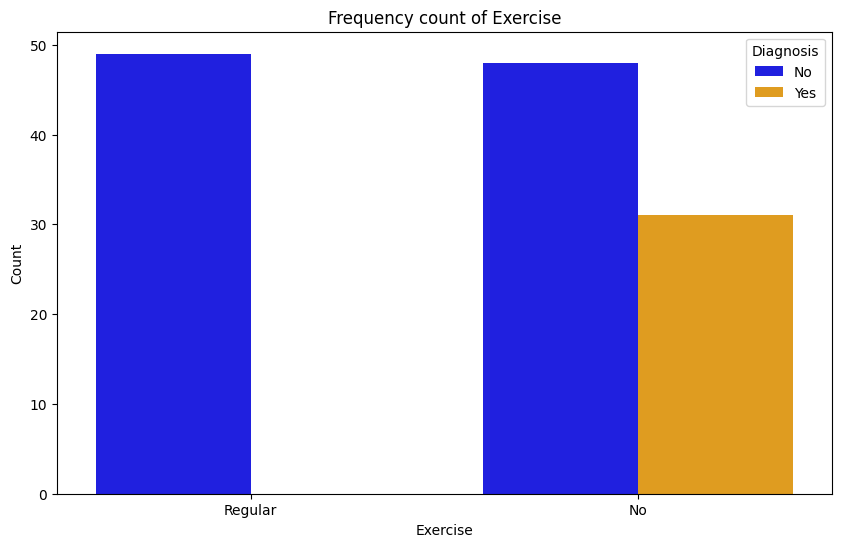

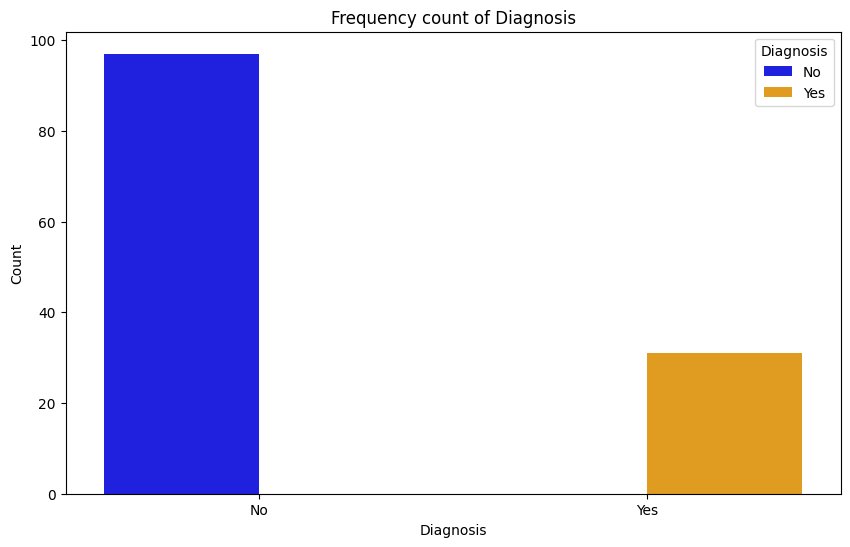

In [8]:
# Custom palette
palette = {'Yes': 'orange', 'No': 'blue'}

for column in df.columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x=column, hue='Diagnosis', palette=palette)
    plt.title(f'Frequency count of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.show()

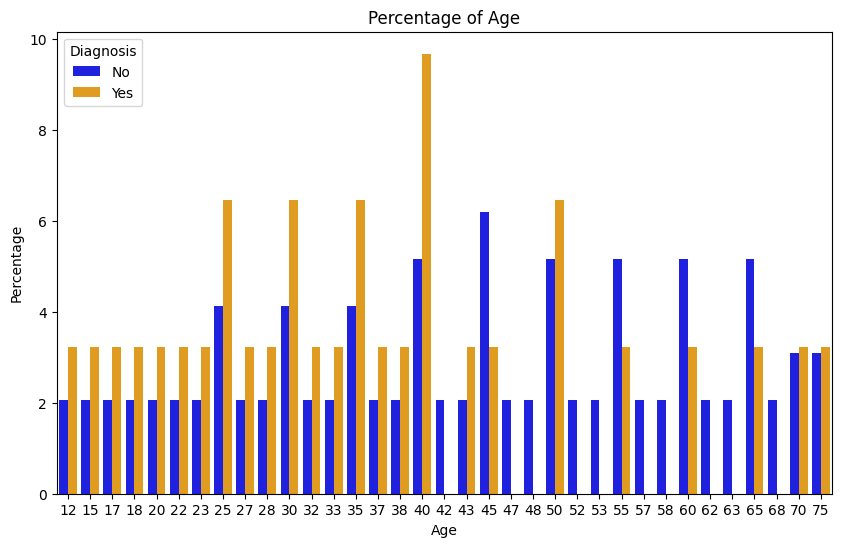

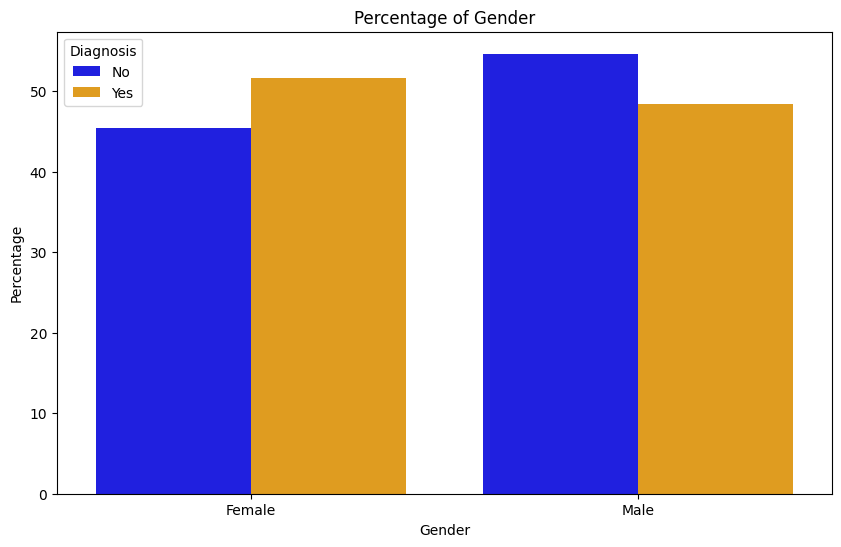

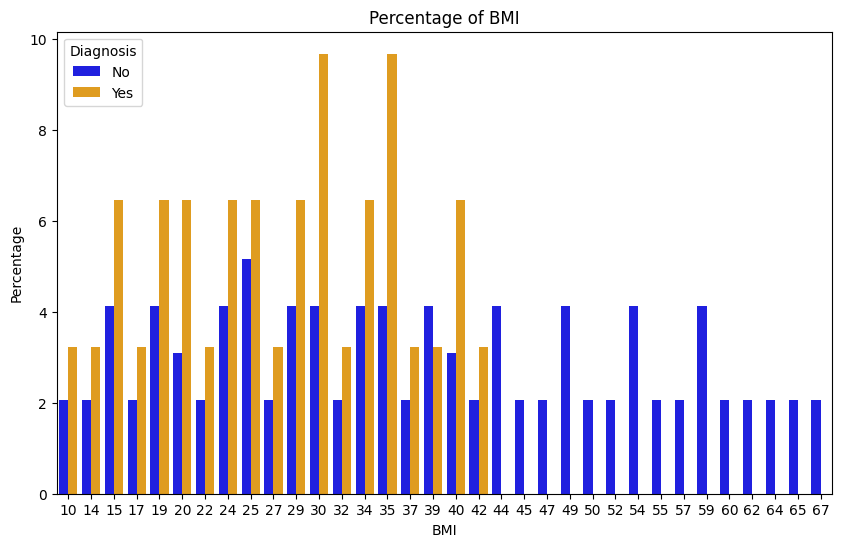

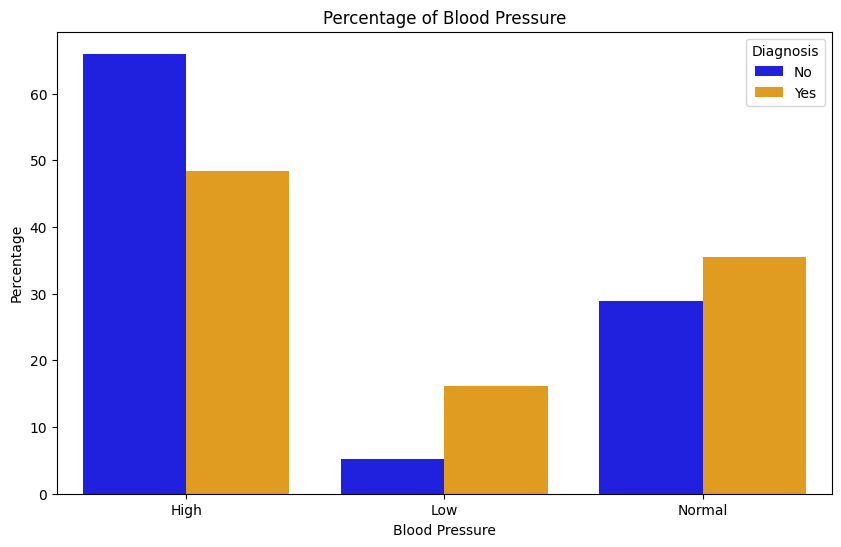

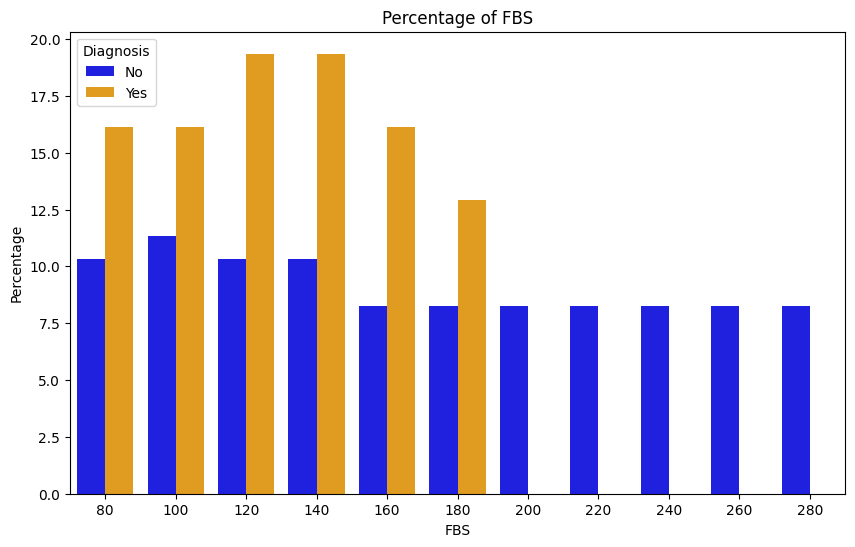

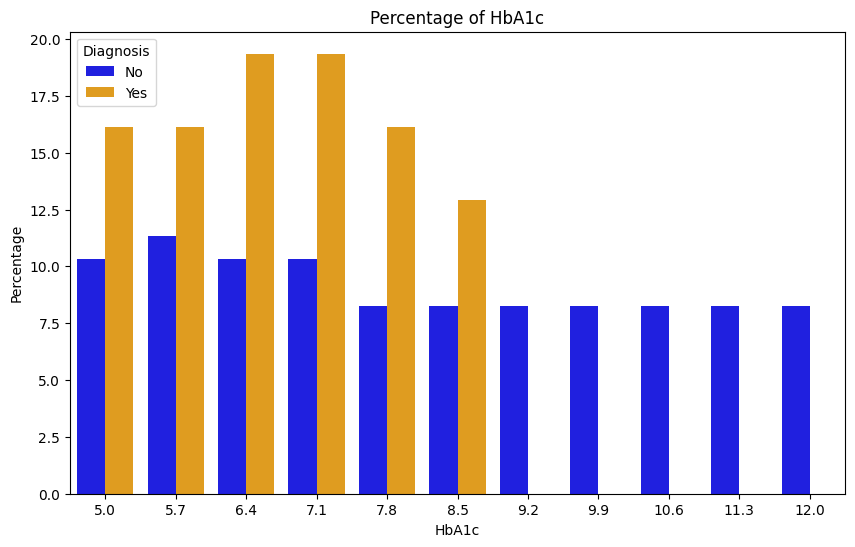

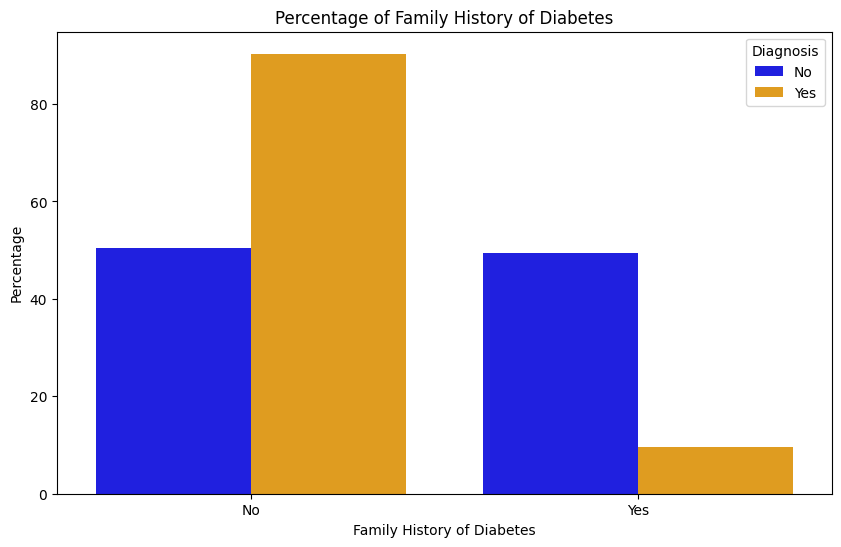

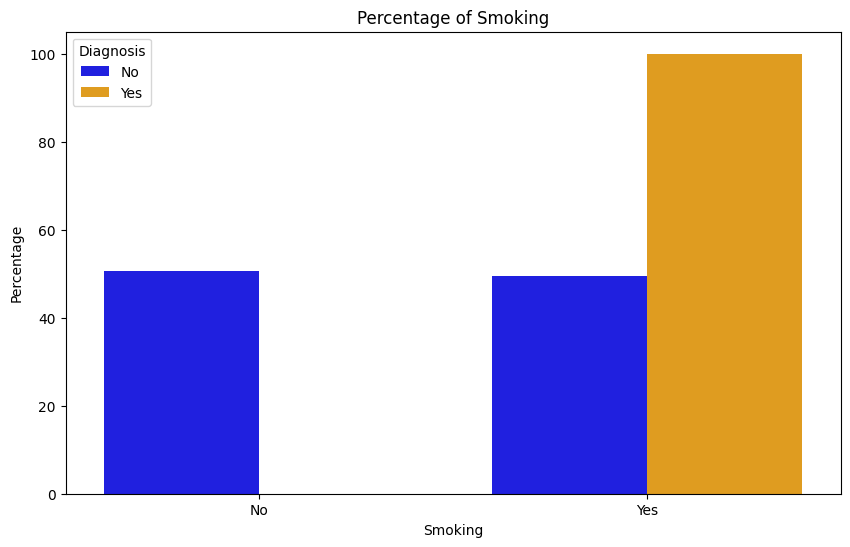

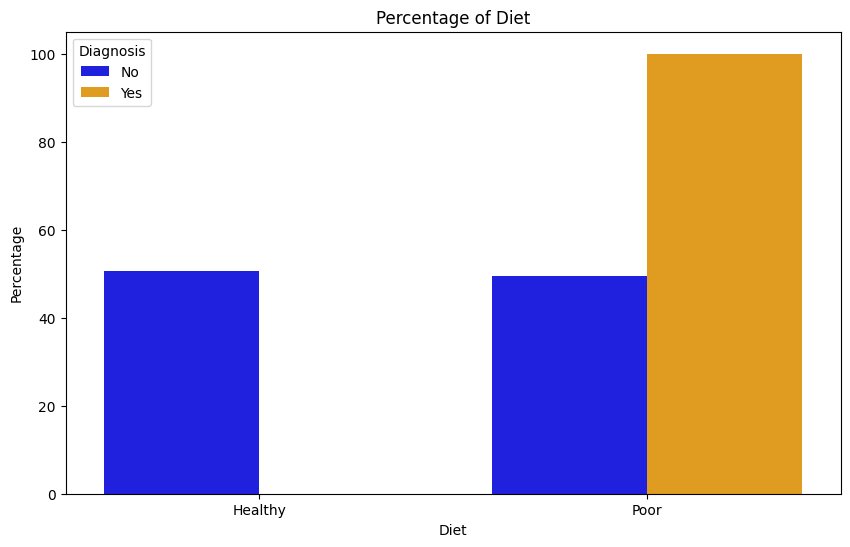

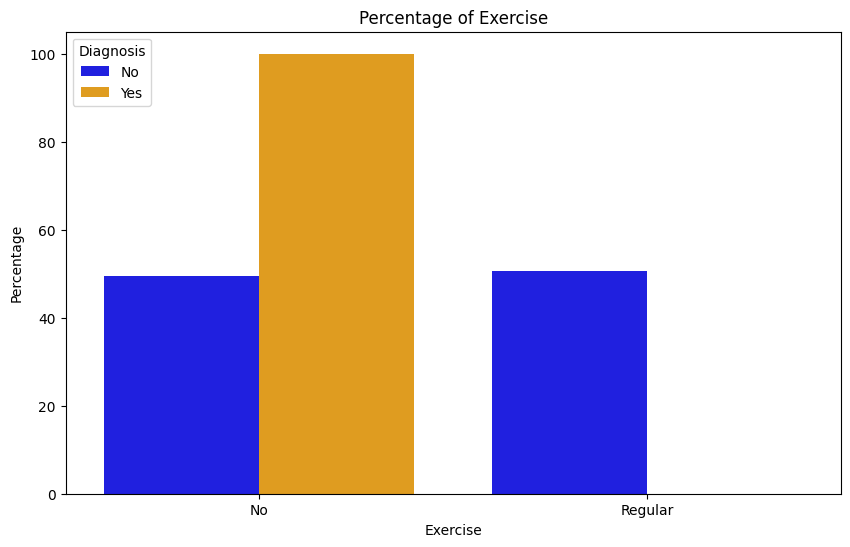

<Figure size 1000x600 with 0 Axes>

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Custom palette
palette = {'Yes': 'orange', 'No': 'blue'}

for column in df.columns:
    try:
        plt.figure(figsize=(10, 6))
        # Calculate the percentage for each category within each diagnosis
        data = df.groupby(['Diagnosis', column]).size().reset_index(name='Count')
        data['Percentage'] = data['Count'] / data.groupby('Diagnosis')['Count'].transform('sum') * 100
        sns.barplot(data=data, x=column, y='Percentage', hue='Diagnosis', palette=palette)
        plt.title(f'Percentage of {column}')
        plt.xlabel(column)
        plt.ylabel('Percentage')
        plt.show()
    except:
        pass


In [10]:
df.columns

Index(['Age', 'Gender', 'BMI', 'Blood Pressure', 'FBS', 'HbA1c',
       'Family History of Diabetes', 'Smoking', 'Diet', 'Exercise',
       'Diagnosis'],
      dtype='object')

In [11]:
# Select categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns

# Print unique values for each categorical column
for col in categorical_columns:
    print(f"Unique values in '{col}': {df[col].unique()}")

Unique values in 'Gender': ['Male' 'Female']
Unique values in 'Blood Pressure': ['Normal' 'High' 'Low']
Unique values in 'Family History of Diabetes': ['No' 'Yes']
Unique values in 'Smoking': ['No' 'Yes']
Unique values in 'Diet': ['Healthy' 'Poor']
Unique values in 'Exercise': ['Regular' 'No']
Unique values in 'Diagnosis': ['No' 'Yes']


In [12]:
# Replace values
df['Blood Pressure'] = df['Blood Pressure'].replace({'Normal': 'Good', 'High': 'Bad', 'Low': 'Bad'})

df

,Age,Gender,BMI,Blood Pressure,FBS,HbA1c,Family History of Diabetes,Smoking,Diet,Exercise,Diagnosis
0,45,Male,25,Good,100,5.7,No,No,Healthy,Regular,No
1,55,Female,30,Bad,120,6.4,Yes,Yes,Poor,No,Yes
2,65,Male,35,Bad,140,7.1,Yes,Yes,Poor,No,Yes
3,75,Female,40,Bad,160,7.8,Yes,Yes,Poor,No,Yes
4,40,Male,20,Good,80,5.0,No,No,Healthy,Regular,No
...,...,...,...,...,...,...,...,...,...,...,...
123,17,Female,15,Good,100,5.7,No,Yes,Poor,No,Yes
124,22,Male,19,Good,120,6.4,No,Yes,Poor,No,Yes
125,27,Female,24,Bad,140,7.1,No,Yes,Poor,No,Yes
126,32,Male,29,Bad,160,7.8,No,Yes,Poor,No,Yes


In [13]:
# Select only numeric columns
numeric_cols = df.select_dtypes(include=['number']).columns

# Calculate Q1 (25th percentile) and Q3 (75th percentile) for numeric columns
Q1 = df[numeric_cols].quantile(0.25)
Q3 = df[numeric_cols].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
df = df[~((df[numeric_cols] < lower_bound) | (df[numeric_cols] > upper_bound)).any(axis=1)]
df

,Age,Gender,BMI,Blood Pressure,FBS,HbA1c,Family History of Diabetes,Smoking,Diet,Exercise,Diagnosis
0,45,Male,25,Good,100,5.7,No,No,Healthy,Regular,No
1,55,Female,30,Bad,120,6.4,Yes,Yes,Poor,No,Yes
2,65,Male,35,Bad,140,7.1,Yes,Yes,Poor,No,Yes
3,75,Female,40,Bad,160,7.8,Yes,Yes,Poor,No,Yes
4,40,Male,20,Good,80,5.0,No,No,Healthy,Regular,No
...,...,...,...,...,...,...,...,...,...,...,...
123,17,Female,15,Good,100,5.7,No,Yes,Poor,No,Yes
124,22,Male,19,Good,120,6.4,No,Yes,Poor,No,Yes
125,27,Female,24,Bad,140,7.1,No,Yes,Poor,No,Yes
126,32,Male,29,Bad,160,7.8,No,Yes,Poor,No,Yes


In [14]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Columns to encode
columns_to_encode = ['Gender', 'Blood Pressure', 'Family History of Diabetes', 'Smoking', 'Diet', 'Exercise', 'Diagnosis']

# Initialize LabelEncoder
le = LabelEncoder()

# Encode each column
for column in columns_to_encode:
    df[column] = le.fit_transform(df[column])
    
df

,Age,Gender,BMI,Blood Pressure,FBS,HbA1c,Family History of Diabetes,Smoking,Diet,Exercise,Diagnosis
0,45,1,25,1,100,5.7,0,0,0,1,0
1,55,0,30,0,120,6.4,1,1,1,0,1
2,65,1,35,0,140,7.1,1,1,1,0,1
3,75,0,40,0,160,7.8,1,1,1,0,1
4,40,1,20,1,80,5.0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
123,17,0,15,1,100,5.7,0,1,1,0,1
124,22,1,19,1,120,6.4,0,1,1,0,1
125,27,0,24,0,140,7.1,0,1,1,0,1
126,32,1,29,0,160,7.8,0,1,1,0,1


In [15]:
from sklearn.preprocessing import MinMaxScaler

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the data
df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

df

,Age,Gender,BMI,Blood Pressure,FBS,HbA1c,Family History of Diabetes,Smoking,Diet,Exercise,Diagnosis
0,0.523810,1.0,0.263158,1.0,0.1,0.1,0.0,0.0,0.0,1.0,0.0
1,0.682540,0.0,0.350877,0.0,0.2,0.2,1.0,1.0,1.0,0.0,1.0
2,0.841270,1.0,0.438596,0.0,0.3,0.3,1.0,1.0,1.0,0.0,1.0
3,1.000000,0.0,0.526316,0.0,0.4,0.4,1.0,1.0,1.0,0.0,1.0
4,0.444444,1.0,0.175439,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
123,0.079365,0.0,0.087719,1.0,0.1,0.1,0.0,1.0,1.0,0.0,1.0
124,0.158730,1.0,0.157895,1.0,0.2,0.2,0.0,1.0,1.0,0.0,1.0
125,0.238095,0.0,0.245614,0.0,0.3,0.3,0.0,1.0,1.0,0.0,1.0
126,0.317460,1.0,0.333333,0.0,0.4,0.4,0.0,1.0,1.0,0.0,1.0


In [16]:
X = df.drop('Diagnosis', axis=1)
X
y = df['Diagnosis']
y

0      0.0
1      1.0
2      1.0
3      1.0
4      0.0
      ... 
123    1.0
124    1.0
125    1.0
126    1.0
127    1.0
Name: Diagnosis, Length: 128, dtype: float64

In [17]:
import pandas as pd
from sklearn.ensemble import (
    BaggingClassifier, BaggingRegressor, RandomForestClassifier, RandomForestRegressor,
    ExtraTreesClassifier, ExtraTreesRegressor, AdaBoostClassifier, AdaBoostRegressor,
    GradientBoostingClassifier, GradientBoostingRegressor, HistGradientBoostingClassifier,
    HistGradientBoostingRegressor, VotingClassifier, VotingRegressor, StackingClassifier,
    StackingRegressor
)
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.datasets import load_breast_cancer

# # Load your dataset
# data = load_breast_cancer()
# X, y = data.data, data.target

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define parameter grids
param_grids = {
    'BaggingClassifier': {
        'n_estimators': [10, 50, 100],
        'max_samples': [0.5, 1.0],
        'max_features': [0.5, 1.0],
        'bootstrap': [True, False]
    },
    'RandomForestClassifier': {
        'n_estimators': [100, 200, 500],
        'max_features': ['sqrt', 'log2'],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10]
    },
    'ExtraTreesClassifier': {
        'n_estimators': [100, 200, 500],
        'max_features': ['sqrt', 'log2'],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10]
    },
    'AdaBoostClassifier': {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 1.0]
    },
    'GradientBoostingClassifier': {
        'n_estimators': [100, 200, 500],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 7]
    },
    'HistGradientBoostingClassifier': {
        'max_iter': [100, 200, 500],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [None, 10, 20]
    },
    'VotingClassifier': {
        'voting': ['hard', 'soft'],
        'weights': [None, [1, 1], [2, 1]]
    },
    'StackingClassifier': {
        'final_estimator': [LogisticRegression(), RandomForestClassifier()],
        'cv': [5, 10]
    }
}

# Define models
models = {
    'BaggingClassifier': BaggingClassifier(),
    'RandomForestClassifier': RandomForestClassifier(),
    'ExtraTreesClassifier': ExtraTreesClassifier(),
    'AdaBoostClassifier': AdaBoostClassifier(),
    'GradientBoostingClassifier': GradientBoostingClassifier(),
    'HistGradientBoostingClassifier': HistGradientBoostingClassifier(),
    'VotingClassifier': VotingClassifier(estimators=[
        ('rf', RandomForestClassifier()), ('et', ExtraTreesClassifier()), ('gb', GradientBoostingClassifier())]),
    'StackingClassifier': StackingClassifier(estimators=[
        ('rf', RandomForestClassifier()), ('et', ExtraTreesClassifier()), ('gb', GradientBoostingClassifier())])
}

# Perform Grid Search and collect results
results = []
for name, model in models.items():
    grid_search = GridSearchCV(model, param_grids[name], cv=5, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_
    train_accuracy = best_model.score(X_train, y_train)
    test_accuracy = best_model.score(X_test, y_test)
    results.append({
        'Model': name,
        'Train Accuracy': train_accuracy,
        'Test Accuracy': test_accuracy,
        'Best Parameters': grid_search.best_params_
    })

# Convert results to DataFrame
results_df = pd.DataFrame(results)
results_df

/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
20 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_voting.py", line 346, in fit
    return super().fit(X, transformed_y, sample_weight)
  File "/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_voting.py", line 76, in fit
    raise ValueError(
ValueError: Number of `estimators` and weights mu

,Model,Train Accuracy,Test Accuracy,Best Parameters
0,BaggingClassifier,1.0,0.923077,"{'bootstrap': True, 'max_features': 1.0, 'max_..."
1,RandomForestClassifier,1.0,0.923077,"{'max_depth': None, 'max_features': 'sqrt', 'm..."
2,ExtraTreesClassifier,1.0,0.923077,"{'max_depth': None, 'max_features': 'sqrt', 'm..."
3,AdaBoostClassifier,1.0,0.923077,"{'learning_rate': 0.1, 'n_estimators': 200}"
4,GradientBoostingClassifier,1.0,0.923077,"{'learning_rate': 0.01, 'max_depth': 5, 'n_est..."
5,HistGradientBoostingClassifier,1.0,1.000000,"{'learning_rate': 0.1, 'max_depth': None, 'max..."
6,VotingClassifier,1.0,0.961538,"{'voting': 'hard', 'weights': None}"
7,StackingClassifier,1.0,0.923077,"{'cv': 5, 'final_estimator': RandomForestClass..."


In [18]:
2

2